In [18]:
import numpy as np
import pandas as pd

In [19]:
sparse_results=pd.read_json("/run/media/ramizouari/INTENSO/MPG/parallel_sparse.json",dtype={"running_time":np.float32},convert_dates=False)
sparse_results["graph"]=sparse_results["graph"].map(lambda x : x.rstrip(".edgeslist.gz"))

In [13]:
import mpg.mpgio as mpgio
import os
from mpg.games import mpg
sparse_dir="/run/media/ramizouari/INTENSO/MPG/dataset/sparse"
def calculate_mean_payoff(file:str,S1,S2):
    MPG=mpgio.read_mpg(file)
    return mpg.mean_payoffs(MPG,S1,S2)

In [10]:
sparse_results["mean_payoffs"]=sparse_results.apply(lambda x: calculate_mean_payoff(os.path.join(sparse_dir,x["graph"]+".edgelist.gz"),x["max_strategy"],x["min_strategy"]),axis=1)

KeyboardInterrupt: 

In [20]:
sparse_results["draw_fraction"]=sparse_results["mean_payoffs"].map(lambda x :(np.array(list(x.values()))==0).mean())
sparse_results["win_fraction"]=sparse_results["mean_payoffs"].map(lambda x :(np.array(list(x.values()))>0).mean())
sparse_results["lose_fraction"]=sparse_results["mean_payoffs"].map(lambda x :(np.array(list(x.values()))<0).mean())

KeyError: 'mean_payoffs'

In [21]:
sparse_benchmark=pd.read_csv("/run/media/ramizouari/INTENSO/MPG/benchmark_gnp_random_mpg_sparse.csv")
sparse_benchmark["filename"]=sparse_benchmark["filename"].map(lambda x : x.rstrip(".gpickle"))
sparse_benchmark

,n,c,p,execution_start,execution_end,time,nodes,edges,distribution,filename
0,4,1,0.2500,2023-03-09 11:53:13.728391,2023-03-09 11:53:13.728610,0.000220,4,5,"integers(-1,1)",gnp_uniform_mpg_4_1_0
1,4,1,0.2500,2023-03-09 11:53:13.732461,2023-03-09 11:53:13.732634,0.000174,4,5,"integers(-1,1)",gnp_uniform_mpg_4_1_1
2,4,1,0.2500,2023-03-09 11:53:13.735499,2023-03-09 11:53:13.735650,0.000152,4,4,"integers(-1,1)",gnp_uniform_mpg_4_1_2
3,4,1,0.2500,2023-03-09 11:53:13.738500,2023-03-09 11:53:13.738680,0.000181,4,5,"integers(-1,1)",gnp_uniform_mpg_4_1_3
4,4,1,0.2500,2023-03-09 11:53:13.741459,2023-03-09 11:53:13.741622,0.000164,4,5,"integers(-1,1)",gnp_uniform_mpg_4_1_4
...,...,...,...,...,...,...,...,...,...,...
4945,10000,9,0.0009,2023-03-09 12:13:13.380542,2023-03-09 12:13:13.964695,0.584152,10000,90139,"integers(-1,1)",gnp_uniform_mpg_10000_9_5
4946,10000,9,0.0009,2023-03-09 12:13:14.424432,2023-03-09 12:13:15.118014,0.693584,10000,89737,"integers(-1,1)",gnp_uniform_mpg_10000_9_6
4947,10000,9,0.0009,2023-03-09 12:13:15.576869,2023-03-09 12:13:16.169705,0.592836,10000,90538,"integers(-1,1)",gnp_uniform_mpg_10000_9_7
4948,10000,9,0.0009,2023-03-09 12:13:16.620096,2023-03-09 12:13:17.332719,0.712623,10000,89911,"integers(-1,1)",gnp_uniform_mpg_10000_9_8


In [22]:
sparse_dataset=sparse_results.merge(sparse_benchmark,left_on="graph",right_on="filename")

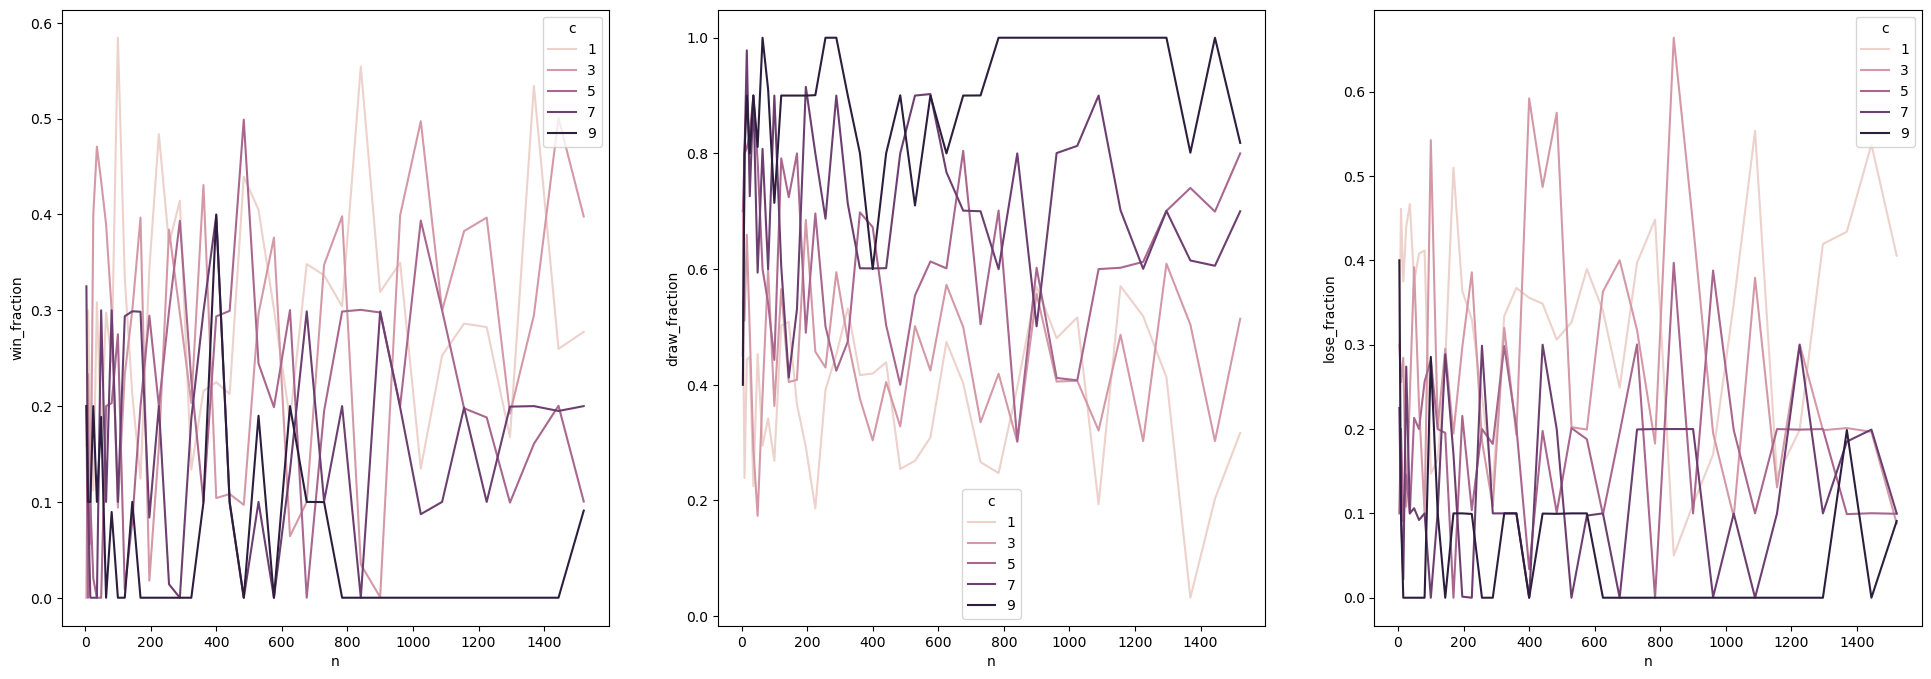

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs=plt.subplots(1,3,figsize=(24,8))
for metric,ax in zip(["win_fraction","draw_fraction","lose_fraction"],axs):
    sns.lineplot(data=sparse_dataset[["n",metric,"c"]].groupby(["n","c"]).mean(),x="n",y=metric,hue="c",estimator="mean",ax=ax)

<Axes: xlabel='n', ylabel='running_time'>

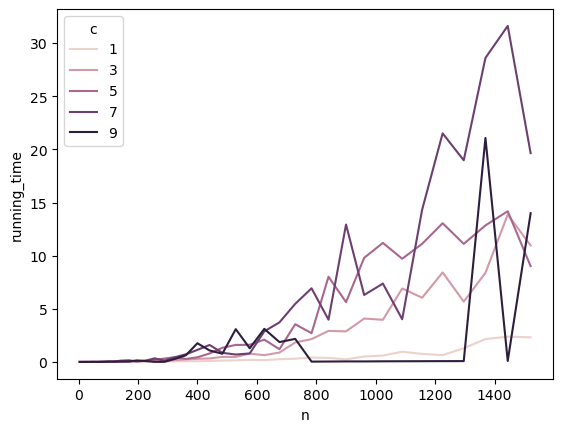

In [17]:
fig,ax=plt.subplots()
sns.lineplot(data=sparse_dataset[["n","running_time","c"]].groupby(["n","c"]).mean(),x="n",y="running_time",hue="c",estimator="max",ax=ax)

In [26]:
dense_results=pd.read_json("/run/media/ramizouari/INTENSO/MPG/results_dense_parallel.json",dtype={"running_time":np.float32},convert_dates=False)
dense_results["graph"]=dense_results["graph"].map(lambda x : x.rstrip(".edgeslist.gz"))

In [27]:
dense_dir="/run/media/ramizouari/INTENSO/MPG/dataset/dense"
dense_results["mean_payoffs"]=dense_results.apply(lambda x: calculate_mean_payoff(os.path.join(dense_dir,x["graph"]+".edgelist.gz"),x["max_strategy"],x["min_strategy"]),axis=1)

KeyboardInterrupt: 

In [28]:
dense_benchmark=pd.read_csv("/run/media/ramizouari/INTENSO/MPG/benchmark_gnp_random_mpg_dense.csv")
dense_benchmark["filename"]=dense_benchmark["filename"].map(lambda x : x.rstrip(".gpickle"))
dense_benchmark

,n,c,p,execution_start,execution_end,time,nodes,edges,distribution,filename
0,4,0,0.01,2023-03-13 11:46:27.979177,2023-03-13 11:46:27.980328,0.001152,4,4,"integers(-1,1)",gnp_uniform_mpg_4_0_0
1,4,0,0.01,2023-03-13 11:46:27.981232,2023-03-13 11:46:27.982080,0.000850,4,4,"integers(-1,1)",gnp_uniform_mpg_4_0_1
2,4,0,0.01,2023-03-13 11:46:27.982593,2023-03-13 11:46:27.983290,0.000697,4,4,"integers(-1,1)",gnp_uniform_mpg_4_0_2
3,4,0,0.01,2023-03-13 11:46:27.983767,2023-03-13 11:46:27.985710,0.001943,4,4,"integers(-1,1)",gnp_uniform_mpg_4_0_3
4,4,0,0.01,2023-03-13 11:46:27.986210,2023-03-13 11:46:27.987556,0.001346,4,4,"integers(-1,1)",gnp_uniform_mpg_4_0_4
...,...,...,...,...,...,...,...,...,...,...
2095,961,961,1.00,2023-03-13 12:13:46.914842,2023-03-13 12:13:51.220493,4.305651,961,923521,"integers(-1,1)",gnp_uniform_mpg_961_961_5
2096,961,961,1.00,2023-03-13 12:13:56.165030,2023-03-13 12:14:00.556898,4.391868,961,923521,"integers(-1,1)",gnp_uniform_mpg_961_961_6
2097,961,961,1.00,2023-03-13 12:14:05.510557,2023-03-13 12:14:09.796038,4.285482,961,923521,"integers(-1,1)",gnp_uniform_mpg_961_961_7
2098,961,961,1.00,2023-03-13 12:14:14.741466,2023-03-13 12:14:19.015347,4.273880,961,923521,"integers(-1,1)",gnp_uniform_mpg_961_961_8


In [29]:
dense_dataset=dense_results.merge(dense_benchmark,left_on="graph",right_on="filename",how="inner")


<Axes: xlabel='n', ylabel='running_time'>

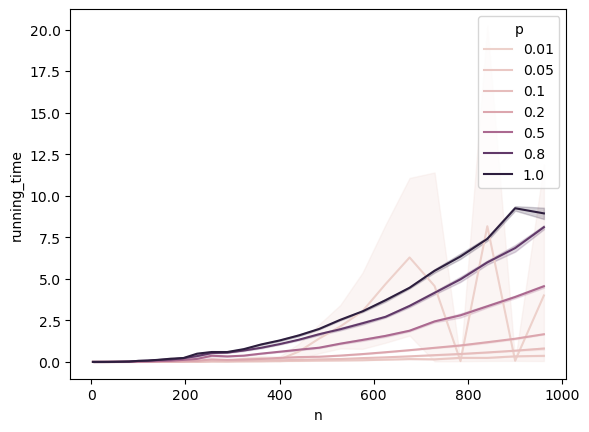

In [31]:
fig,ax=plt.subplots()
sns.lineplot(data=dense_dataset,x="n",y="running_time",hue="p",ax=ax,legend="full")

In [78]:
from sklearn import linear_model
regression={}
for p in dense_dataset["p"].unique():
    D=dense_dataset[dense_dataset["p"]==p]
    regression[p]=linear_model.LinearRegression()
    X_log=np.log(D.groupby(["n"]).max().index).to_numpy().reshape(-1,1)
    y_log=np.log(D.groupby(["n"]).max()["running_time"])
    regression[p].fit(X_log,y_log)




In [79]:
{p:regression[p].coef_ for p in dense_dataset["p"].unique()}

{0.5: array([1.97822314]),
 0.8: array([2.05114959]),
 1.0: array([2.09021044]),
 0.01: array([2.50661475]),
 0.05: array([1.52189807]),
 0.1: array([1.42965066]),
 0.2: array([1.83870154])}

<Axes: xlabel='n', ylabel='running_time'>

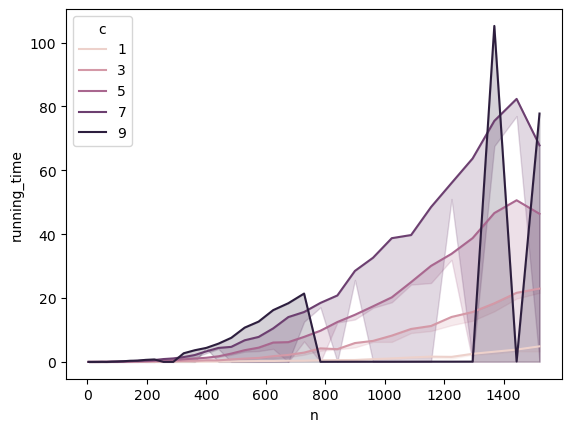

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
sns.lineplot(data=sparse_dataset,x="n",y="running_time",estimator="max",hue="c",ax=ax,legend="full")

$$
p=\frac{c}{n}
$$